In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive if you haven't already
drive.mount('/content/drive')

# Specify the folder path containing images

Mounted at /content/drive


In [ ]:
!pip uninstall dlib

!pip install dlib

Found existing installation: dlib 19.24.6
Uninstalling dlib-19.24.6:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/_dlib_pybind11.cpython-311-x86_64-linux-gnu.so
    /usr/local/lib/python3.11/dist-packages/dlib-19.24.6.dist-info/*
    /usr/local/lib/python3.11/dist-packages/dlib/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_uninstall.py", line 364, in remov

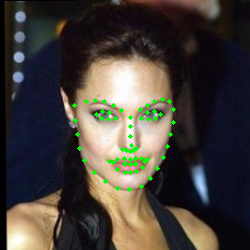

Relevant Landmarks: [(130, 117), (130, 126), (130, 136), (131, 145), (122, 149), (126, 150), (130, 151), (133, 150), (136, 148), (96, 114), (102, 111), (109, 112), (115, 118), (108, 119), (101, 118), (141, 118), (147, 112), (154, 111), (160, 114), (155, 118), (148, 119), (141, 158), (117, 159), (124, 158), (130, 159), (135, 158), (130, 172), (125, 172), (129, 189)]


In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

# Assuming you have already defined `detector` and `predictor` using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

# Load the detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")

def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected.")
        return None

    face = faces[0]
    landmarks = predictor(gray, face)

    # Draw landmarks on the image
    for i in range(68):
        x, y = landmarks.part(i).x, landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green dots

    # Display the image with landmarks
    cv2_imshow(image)

    # Convert to list of (x, y) coordinates
    landmark_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    return landmark_list  # Return as a list of tuples

# Get the landmarks
land = process_image("/content/drive/MyDrive/Dataset2/Angelina_Jolie_0014.jpg")

def select_relevant_landmarks(landmarks_68):
    """
    Selects 31 relevant facial landmarks from the 68 detected landmarks.
    Args:
        landmarks_68 (list of tuples): List of (x, y) coordinates for all 68 facial landmarks.
    Returns:
        list of tuples: List of (x, y) coordinates for the selected 31 relevant landmarks.
    """
    relevant_indices = [
        27, 28, 29, 30, 31, 32, 33, 34, 35,   # Nose bridge and tip
        36, 37, 38, 39, 40, 41,               # Left eye
        42, 43, 44, 45, 46, 47,               # Right eye
        53, 49, 50, 51, 52,                   # Upper lip (mouth)
        57, 58,                               # Lower lip (mouth)
        8                                     # Chin landmark
    ]

    # Ensure landmarks_68 is a list before indexing
    if not isinstance(landmarks_68, list):
        print("Error: Expected a list of (x, y) coordinates.")
        return None

    # Extract relevant landmarks
    relevant_landmarks = [landmarks_68[i] for i in relevant_indices]
    return relevant_landmarks

# Select relevant landmarks
if land:
    relevant_landmarks = select_relevant_landmarks(land)
    print("Relevant Landmarks:", relevant_landmarks)


In [ ]:
import os
import pandas as pd

folder_path = "/content/drive/MyDrive/Dataset2"

# Get list of all image files
image_files = []
valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

for filename in os.listdir(folder_path):
    if filename.lower().endswith(valid_extensions):
        image_files.append(filename)

# Create DataFrame
df = pd.DataFrame(image_files, columns=['Image_Name'])

# Extract Name (removing numbers and file extension)
df['Name'] = df['Image_Name'].str.replace(r'_\d+\.\w+$', '', regex=True)

# Display first few rows of the DataFrame
print("Total images found:", len(df))
print("\nFirst few entries of the DataFrame:")
print(df.head())

# Optionally save to CSV
# df.to_csv('image_names.csv', index=False)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Name'], random_state=42)
test_df

Total images found: 86

First few entries of the DataFrame:
              Image_Name          Name
0  Andre_Agassi_0010.jpg  Andre_Agassi
1  Andre_Agassi_0002.jpg  Andre_Agassi
2  Andre_Agassi_0008.jpg  Andre_Agassi
3  Andre_Agassi_0015.jpg  Andre_Agassi
4  Andre_Agassi_0003.jpg  Andre_Agassi


,Image_Name,Name
59,Angelina_Jolie_0009.jpg,Angelina_Jolie
44,Angelina_Jolie_0019.jpg,Angelina_Jolie
10,Andre_Agassi_0001.jpg,Andre_Agassi
60,Angelina_Jolie_0003.jpg,Angelina_Jolie
20,Andy_Roddick_0003.jpg,Andy_Roddick
65,Ann_Veneman_0001.jpg,Ann_Veneman
12,Andre_Agassi_0005.jpg,Andre_Agassi
43,Anna_Kournikova_0006.jpg,Anna_Kournikova
32,Andy_Roddick_0007.jpg,Andy_Roddick
3,Andre_Agassi_0015.jpg,Andre_Agassi


In [ ]:
import os
import cv2
import numpy as np
import dlib
import pandas as pd
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")

# Define function to extract 31 relevant facial landmarks
def select_relevant_landmarks(landmarks_68):
    relevant_indices = [
        27, 28, 29, 30, 31, 32, 33, 34, 35,   # Nose bridge and tip
        36, 37, 38, 39, 40, 41,               # Left eye
        42, 43, 44, 45, 46, 47,               # Right eye
        53, 49, 50, 51, 52,                   # Upper lip (mouth)
        57, 58,                               # Lower lip (mouth)
        8                                     # Chin landmark
    ]
    return [landmarks_68[i] for i in relevant_indices] if isinstance(landmarks_68, list) else None

# Define function to extract facial landmarks
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        return None  # No face detected

    landmarks = predictor(gray, faces[0])
    return [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

# Enhanced LBP descriptor extraction with custom parameters
def extract_lbp_descriptor(image_path, landmark, patch_size=(36, 36), radius=3, n_points=16, n_bins=250):
    """
    Extract LBP descriptor with custom parameters:
    - radius: 3 (as specified)
    - n_points: 16 (circular symmetric points for KLBP)
    - patch_size: 36×36 (as specified)
    - n_bins: 250 (number of histogram bins)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None

    x, y = landmark
    height, width = image.shape

    # Calculate patch boundaries
    half_width = patch_size[0] // 2
    half_height = patch_size[1] // 2

    # Ensure the patch stays within image boundaries
    x_start = max(0, int(x) - half_width)
    x_end = min(width, int(x) + half_width)
    y_start = max(0, int(y) - half_height)
    y_end = min(height, int(y) + half_height)

    # Extract patch
    patch = image[y_start:y_end, x_start:x_end]

    # Resize patch to standard size if it was cropped at boundaries
    if patch.shape[0] != patch_size[0] or patch.shape[1] != patch_size[1]:
        patch = cv2.resize(patch, patch_size)

    # Compute LBP features with specified parameters
    lbp = local_binary_pattern(patch, n_points, radius, method='uniform')

    # Calculate histogram of LBP codes with specified number of bins
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))

    # Normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Add small value to avoid division by zero

    return hist

# Load dataset
folder_path = "/content/drive/MyDrive/Dataset2"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
df = pd.DataFrame(image_files, columns=['Image_Name'])
df['Name'] = df['Image_Name'].str.replace(r'_\d+\.\w+$', '', regex=True)

# Function to process LBP descriptors for all relevant landmarks
def process_all_lbp_descriptors(df, folder_path):
    """
    Processes images in the given DataFrame to extract LBP descriptors for all relevant landmarks,
    using the specified parameters (radius=3, n_points=16, n_bins=250).
    """
    landmark_dfs = {}

    for landmark_idx in range(29):  # For all 29 landmarks
        lbp_descriptors = []

        for _, row in df.iterrows():
            image_path = os.path.join(folder_path, row['Image_Name'])
            landmarks = extract_landmarks(image_path)

            if landmarks:
                relevant_landmarks = select_relevant_landmarks(landmarks)
                if relevant_landmarks:
                    landmark = relevant_landmarks[landmark_idx]
                    descriptor = extract_lbp_descriptor(
                        image_path,
                        landmark,
                        patch_size=(36, 36),
                        radius=3,
                        n_points=16,
                        n_bins=250
                    )

                    # Convert descriptor to a parseable string format
                    if descriptor is not None:
                        descriptor_str = ",".join(map(str, descriptor))
                    else:
                        descriptor_str = None
                else:
                    descriptor_str = None
            else:
                descriptor_str = None

            lbp_descriptors.append(descriptor_str)

        # Create DataFrame for this landmark
        landmark_df = df.copy()
        landmark_df[f'Landmark_{landmark_idx}_LBP_Descriptor'] = lbp_descriptors
        landmark_dfs[f'Landmark_{landmark_idx}'] = landmark_df

    return landmark_dfs

# Process all landmarks with LBP features using custom parameters
landmark_dfs = process_all_lbp_descriptors(df, folder_path)

# Save each DataFrame to CSV
output_folder = "/content/drive/MyDrive/LBP_Descriptors_Custom"
os.makedirs(output_folder, exist_ok=True)

for landmark_name, landmark_df in landmark_dfs.items():
    output_path = os.path.join(output_folder, f"{landmark_name}_LBP_Descriptors.csv")
    landmark_df.to_csv(output_path, index=False)
    print(f"Saved {output_path}")

Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_0_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_1_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_2_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_3_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_4_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_5_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_6_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_7_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_8_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_9_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_10_LBP_Descriptors.csv
Saved /content/drive/MyDrive/LBP_Descriptors_Custom/Landmark_11_LBP_Descriptors.csv
Sa

In [ ]:
landmark_dfs = process_all_lbp_descriptors(test_df, folder_path)

# Save each DataFrame to a separate CSV file
output_folder = "/content/drive/MyDrive/lbp_Descriptors_test_df"
os.makedirs(output_folder, exist_ok=True)

for landmark_name, landmark_df in landmark_dfs.items():
    output_path = os.path.join(output_folder, f"{landmark_name}_LBP_Descriptors.csv")
    landmark_df.to_csv(output_path, index=False)
    print(f"Saved {output_path}")

Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_0_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_1_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_2_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_3_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_4_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_5_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_6_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_7_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_8_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_9_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_10_LBP_Descriptors.csv
Saved /content/drive/MyDrive/lbp_Descriptors_test_df/Landmark_11_LBP_Descri

In [ ]:
def expand_lbp_descriptors(df, n_bins=250):
    """
    Optimized version that expands all LBP descriptor columns into separate columns
    using pd.concat to avoid DataFrame fragmentation.

    Parameters:
    - df: Input DataFrame containing LBP descriptor strings
    - n_bins: Number of bins in the LBP histogram (default 250 as per your specification)
    """
    # Make a copy of original non-descriptor columns
    original_cols = [col for col in df.columns if 'LBP_Descriptor' not in col]
    result_df = df[original_cols].copy()

    # Find all LBP descriptor columns
    lbp_cols = [col for col in df.columns if 'LBP_Descriptor' in col]

    for col in lbp_cols:
        # Extract base name for new columns
        base_name = col.replace('_LBP_Descriptor', '')

        # Create a temporary DataFrame for the expanded features
        temp_dfs = []

        # Create all n_bins columns at once
        for i in range(n_bins):
            new_col_name = f"{base_name}_LBP_{i}"
            temp_df = pd.DataFrame({
                new_col_name: df[col].apply(
                    lambda x: float(x.split(',')[i]) if pd.notna(x) and len(x.split(',')) > i else None
                )
            })
            temp_dfs.append(temp_df)

        # Concatenate all temporary DataFrames at once
        expanded_features = pd.concat(temp_dfs, axis=1)

        # Join with the result DataFrame
        result_df = pd.concat([result_df, expanded_features], axis=1)

    return result_df

In [ ]:
# Assuming you have a DataFrame with LBP descriptors
expanded_df = expand_lbp_descriptors(landmark_df, n_bins=250)
expanded_df

,Image_Name,Name,Landmark_28_LBP_0,Landmark_28_LBP_1,Landmark_28_LBP_2,Landmark_28_LBP_3,Landmark_28_LBP_4,Landmark_28_LBP_5,Landmark_28_LBP_6,Landmark_28_LBP_7,...,Landmark_28_LBP_240,Landmark_28_LBP_241,Landmark_28_LBP_242,Landmark_28_LBP_243,Landmark_28_LBP_244,Landmark_28_LBP_245,Landmark_28_LBP_246,Landmark_28_LBP_247,Landmark_28_LBP_248,Landmark_28_LBP_249
59,Angelina_Jolie_0009.jpg,Angelina_Jolie,0.028549,0.027778,0.047840,0.024691,0.036265,0.062500,0.080247,0.148920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Angelina_Jolie_0019.jpg,Angelina_Jolie,0.047068,0.035494,0.034722,0.030093,0.024691,0.032407,0.051698,0.092593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Andre_Agassi_0001.jpg,Andre_Agassi,0.033179,0.029321,0.044753,0.043210,0.058642,0.077160,0.071759,0.111883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,Angelina_Jolie_0003.jpg,Angelina_Jolie,0.034722,0.020833,0.034722,0.042438,0.031636,0.063272,0.070216,0.101080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Andy_Roddick_0003.jpg,Andy_Roddick,0.032407,0.012346,0.025463,0.045525,0.048611,0.084877,0.073302,0.101852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,Ann_Veneman_0001.jpg,Ann_Veneman,0.031636,0.029321,0.028549,0.033179,0.040123,0.055556,0.081019,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Andre_Agassi_0005.jpg,Andre_Agassi,0.043210,0.032407,0.034722,0.041667,0.044753,0.059414,0.079475,0.107253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,Anna_Kournikova_0006.jpg,Anna_Kournikova,0.030864,0.017747,0.023148,0.050154,0.066358,0.071759,0.064815,0.108796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Andy_Roddick_0007.jpg,Andy_Roddick,0.044753,0.043981,0.051698,0.047068,0.036265,0.051698,0.060185,0.094136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andre_Agassi_0015.jpg,Andre_Agassi,0.060185,0.050926,0.030864,0.043210,0.037037,0.031636,0.049383,0.078704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import os

def expand_lbp_descriptors_in_all_files(directory_path, num_files=29, n_bins=250):
    """
    Process all LBP descriptor CSV files in the specified directory,
    expand the descriptors, and overwrite the original files.

    Args:
        directory_path (str): Path to the directory containing the CSV files
        num_files (int): Number of files to process (0 to num_files-1)
        n_bins (int): Number of bins in the LBP histogram (default: 250)
    """
    for i in range(num_files):
        # Construct file path
        file_name = f"Landmark_{i}_LBP_Descriptors.csv"
        file_path = os.path.join(directory_path, file_name)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File {file_name} not found, skipping...")
            continue

        try:
            # Load the CSV file
            df = pd.read_csv(file_path)

            # Expand the descriptors
            expanded_df = expand_lbp_descriptors(df, n_bins=n_bins)

            # Save back to the same file, overwriting the original
            expanded_df.to_csv(file_path, index=False)
            print(f"Processed and overwrote {file_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")

def expand_lbp_descriptors(df, n_bins=250):
    """
    Optimized version that expands all LBP descriptor columns into separate columns
    using pd.concat to avoid DataFrame fragmentation.

    Args:
        df (pd.DataFrame): Input DataFrame containing LBP descriptors
        n_bins (int): Number of bins in the LBP histogram (default: 250)
    """
    # Make a copy of original non-descriptor columns
    original_cols = [col for col in df.columns if 'LBP_Descriptor' not in col]
    result_df = df[original_cols].copy()

    # Find all LBP descriptor columns
    lbp_cols = [col for col in df.columns if 'LBP_Descriptor' in col]

    for col in lbp_cols:
        # Extract base name for new columns
        base_name = col.replace('_LBP_Descriptor', '')

        # Create a temporary DataFrame for the expanded features
        temp_dfs = []

        # Create all n_bins columns at once
        for i in range(n_bins):
            new_col_name = f"{base_name}_LBP_{i}"
            temp_df = pd.DataFrame({
                new_col_name: df[col].apply(
                    lambda x: float(x.split(',')[i]) if pd.notna(x) and len(x.split(',')) > i else None
                )
            })
            temp_dfs.append(temp_df)

        # Concatenate all temporary DataFrames at once
        expanded_features = pd.concat(temp_dfs, axis=1)

        # Join with the result DataFrame
        result_df = pd.concat([result_df, expanded_features], axis=1)

    return result_df

# Usage example:
directory_path = "/content/drive/MyDrive/LBP_Descriptors_Custom"  # Changed to LBP directory
expand_lbp_descriptors_in_all_files(directory_path, num_files=29, n_bins=250)

Processed and overwrote Landmark_0_LBP_Descriptors.csv
Processed and overwrote Landmark_1_LBP_Descriptors.csv
Processed and overwrote Landmark_2_LBP_Descriptors.csv
Processed and overwrote Landmark_3_LBP_Descriptors.csv
Processed and overwrote Landmark_4_LBP_Descriptors.csv
Processed and overwrote Landmark_5_LBP_Descriptors.csv
Processed and overwrote Landmark_6_LBP_Descriptors.csv
Processed and overwrote Landmark_7_LBP_Descriptors.csv
Processed and overwrote Landmark_8_LBP_Descriptors.csv
Processed and overwrote Landmark_9_LBP_Descriptors.csv
Processed and overwrote Landmark_10_LBP_Descriptors.csv
Processed and overwrote Landmark_11_LBP_Descriptors.csv
Processed and overwrote Landmark_12_LBP_Descriptors.csv
Processed and overwrote Landmark_13_LBP_Descriptors.csv
Processed and overwrote Landmark_14_LBP_Descriptors.csv
Processed and overwrote Landmark_15_LBP_Descriptors.csv
Processed and overwrote Landmark_16_LBP_Descriptors.csv
Processed and overwrote Landmark_17_LBP_Descriptors.csv
Pr

In [ ]:
directory_path = "/content/drive/MyDrive/lbp_Descriptors_test_df"  # Changed to LBP directory
expand_lbp_descriptors_in_all_files(directory_path, num_files=29, n_bins=250)

Processed and overwrote Landmark_0_LBP_Descriptors.csv
Processed and overwrote Landmark_1_LBP_Descriptors.csv
Processed and overwrote Landmark_2_LBP_Descriptors.csv
Processed and overwrote Landmark_3_LBP_Descriptors.csv
Processed and overwrote Landmark_4_LBP_Descriptors.csv
Processed and overwrote Landmark_5_LBP_Descriptors.csv
Processed and overwrote Landmark_6_LBP_Descriptors.csv
Processed and overwrote Landmark_7_LBP_Descriptors.csv
Processed and overwrote Landmark_8_LBP_Descriptors.csv
Processed and overwrote Landmark_9_LBP_Descriptors.csv
Processed and overwrote Landmark_10_LBP_Descriptors.csv
Processed and overwrote Landmark_11_LBP_Descriptors.csv
Processed and overwrote Landmark_12_LBP_Descriptors.csv
Processed and overwrote Landmark_13_LBP_Descriptors.csv
Processed and overwrote Landmark_14_LBP_Descriptors.csv
Processed and overwrote Landmark_15_LBP_Descriptors.csv
Processed and overwrote Landmark_16_LBP_Descriptors.csv
Processed and overwrote Landmark_17_LBP_Descriptors.csv
Pr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib
import os

# Define paths and parameters
input_dir = "/content/drive/MyDrive/LBP_Descriptors_Custom/"  # Changed to LBP directory
output_dir = "/content/drive/MyDrive/SVM_Models_LBP_Simple/"  # Create this directory first
N_BINS = 250  # Number of bins in LBP histogram

# Function to get LBP columns for a specific landmark
def get_lbp_columns(landmark_num):
    return [f'Landmark_{landmark_num}_LBP_{i}' for i in range(N_BINS)]

# Define your pipeline and parameter grid
def create_svm_pipeline():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Fill NA with 0
        ('scaler', StandardScaler()),  # Standardize features
        ('svm', SVC(probability=True, random_state=42))  # SVM model
    ])
    return pipeline

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'svm__degree': [2, 3, 4]  # Degree for poly kernel
}

# Process each landmark file
for landmark_num in range(29):  # Assuming files are named Landmark_0 to Landmark_28
    file_path = os.path.join(input_dir, f"Landmark_{landmark_num}_LBP_Descriptors.csv")

    # Load data
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File for Landmark {landmark_num} not found, skipping...")
        continue

    # Get LBP columns for this landmark
    lbp_columns = get_lbp_columns(landmark_num)

    # Verify we have the expected columns
    missing_cols = [col for col in lbp_columns if col not in df.columns]
    if missing_cols:
        print(f"Missing {len(missing_cols)} LBP columns for Landmark {landmark_num}, skipping...")
        continue

    # Create labels - modify this according to your actual labeling needs
    # This is just an example - adjust based on your actual classes
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

    # Fill NA and normalize
    df[lbp_columns] = df[lbp_columns].fillna(0)
    # Normalize each row (L1 normalization)
     # Avoid division by zero

    # Prepare training data
    X_train = df[lbp_columns]
    y_train = df['Label']

    # Check if we have samples from both classes
    if len(np.unique(y_train)) < 2:
        print(f"Landmark {landmark_num} has only one class, skipping...")
        continue

    # Create and train SVM model with grid search
    pipeline = create_svm_pipeline()
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    print(f"\nTraining model for Landmark {landmark_num}...")
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_model = grid_search.best_estimator_
    model_path = os.path.join(output_dir, f"svm_landmark_{landmark_num}.joblib")
    joblib.dump(best_model, model_path)

    # Print results
    print(f"Landmark {landmark_num} - Best parameters: {grid_search.best_params_}")
    print(f"Landmark {landmark_num} - Best CV accuracy: {grid_search.best_score_:.4f}")
    print("-" * 50)

print("\nAll models trained and saved successfully!")


Training model for Landmark 0...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 0 - Best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Landmark 0 - Best CV accuracy: 0.8366
--------------------------------------------------

Training model for Landmark 1...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 1 - Best parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Landmark 1 - Best CV accuracy: 0.8020
--------------------------------------------------

Training model for Landmark 2...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 2 - Best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Landmark 2 - Best CV accuracy: 0.8150
--------------------------------------------------

Training model for Landmark 3...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 3 - Best parameters: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from tqdm import tqdm

# Configuration
test_dir = "/content/drive/MyDrive/lbp_Descriptors_test_df/"
model_dir = "/content/drive/MyDrive/SVM_Models_LBP_Simple/"
output_dir = "/content/drive/MyDrive/Results_LBP/"
os.makedirs(output_dir, exist_ok=True)
N_BINS = 250

# Initialize storage
metrics = []
all_predictions = []
all_probabilities = []
test_dfs = []

# First pass: Load test data
print("Loading test data...")
for landmark_num in tqdm(range(29)):
    test_file = os.path.join(test_dir, f"Landmark_{landmark_num}_LBP_Descriptors.csv")
    try:
        df = pd.read_csv(test_file)

        # Get LBP columns
        lbp_columns = [f'Landmark_{landmark_num}_LBP_{i}' for i in range(N_BINS)]

        # Verify columns exist
        missing_cols = [col for col in lbp_columns if col not in df.columns]
        if missing_cols:
            print(f"Missing {len(missing_cols)} LBP columns for Landmark {landmark_num}, skipping...")
            continue

        # Preprocess data
        df[lbp_columns] = df[lbp_columns].fillna(0)
        row_sums = df[lbp_columns].sum(axis=1)
        df[lbp_columns] = df[lbp_columns].div(row_sums.replace(0, 1), axis=0)

        # Add label
        df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

        test_dfs.append(df)

    except FileNotFoundError:
        print(f"Test file for Landmark {landmark_num} not found, skipping...")
        continue

# Second pass: Process models and make predictions
print("\nEvaluating models...")
for landmark_num in tqdm(range(29)):
    if landmark_num >= len(test_dfs) or test_dfs[landmark_num] is None:
        continue

    test_df = test_dfs[landmark_num]
    lbp_columns = [f'Landmark_{landmark_num}_LBP_{i}' for i in range(N_BINS)]

    X_test = test_df[lbp_columns]
    y_test = test_df['Label']

    # Load and evaluate model
    model_path = os.path.join(model_dir, f"svm_landmark_{landmark_num}.joblib")
    try:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        all_predictions.append(y_pred)
        all_probabilities.append(y_proba)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        metrics.append({
            'Landmark': landmark_num,
            'Accuracy': accuracy,
            'Precision': report['1']['precision'],
            'Recall': report['1']['recall'],
            'F1-Score': report['1']['f1-score'],
            'TP': cm[1, 1],
            'FP': cm[0, 1],
            'FN': cm[1, 0],
            'TN': cm[0, 0]
        })
    except FileNotFoundError:
        print(f"Model for Landmark {landmark_num} not found, skipping...")
        continue

# Process results and create ensemble predictions
if len(test_dfs) > 0:
    results_df = test_dfs[0][['Image_Name', 'Name', 'Label']].copy()

    # Add individual model predictions and probabilities
    for landmark_num in range(len(all_predictions)):
        results_df[f'Model_{landmark_num}_Pred'] = all_predictions[landmark_num]
        results_df[f'Model_{landmark_num}_Proba'] = all_probabilities[landmark_num]

    # Calculate average probabilities
    all_probabilities_array = np.array(all_probabilities)
    avg_probabilities = np.mean(all_probabilities_array, axis=0)
    results_df['Average_Probability'] = avg_probabilities

    # Calculate thresholds
    ptop_80_threshold = np.percentile(avg_probabilities, 80)
    median_threshold = np.median(avg_probabilities)

    # Create ensemble predictions
    results_df['Ensemble_Prediction_Majority'] = np.round(np.mean(np.array(all_predictions), axis=0))
    results_df['Ensemble_Prediction_Ptop80'] = (avg_probabilities >= ptop_80_threshold).astype(int)
    results_df['Ensemble_Prediction_Median'] = (avg_probabilities >= median_threshold).astype(int)

    # Evaluate ensemble methods
    ensemble_metrics = []
    methods = ['Majority', 'Ptop80', 'Median']

    for method in methods:
        pred_col = f'Ensemble_Prediction_{method}'
        results_df[f'Correct_{method}'] = results_df['Label'] == results_df[pred_col]

        accuracy = accuracy_score(results_df['Label'], results_df[pred_col])
        report = classification_report(results_df['Label'], results_df[pred_col], output_dict=True)
        cm = confusion_matrix(results_df['Label'], results_df[pred_col])

        threshold_value = ('Majority' if method == 'Majority'
                         else f'{ptop_80_threshold:.4f}' if method == 'Ptop80'
                         else f'{median_threshold:.4f}')

        ensemble_metrics.append({
            'Method': method,
            'Threshold': threshold_value,
            'Accuracy': accuracy,
            'Precision': report['1']['precision'],
            'Recall': report['1']['recall'],
            'F1-Score': report['1']['f1-score'],
            'TP': cm[1, 1],
            'FP': cm[0, 1],
            'FN': cm[1, 0],
            'TN': cm[0, 0]
        })

    # Save results
    pd.DataFrame(ensemble_metrics).to_csv(os.path.join(output_dir, 'ensemble_comparison.csv'), index=False)
    results_df.to_csv(os.path.join(output_dir, 'final_results.csv'), index=False)
    pd.DataFrame(metrics).to_csv(os.path.join(output_dir, 'individual_metrics.csv'), index=False)

    # Create visualizations
    plt.figure(figsize=(15, 8))
    for i in range(len(all_predictions)):
        sns.kdeplot(results_df[f'Model_{i}_Proba'], alpha=0.3, linewidth=0.5)
    sns.kdeplot(avg_probabilities, label='Average Probability', color='black', linewidth=2)
    plt.axvline(ptop_80_threshold, color='red', linestyle='--',
                label=f'Ptop 80% Threshold ({ptop_80_threshold:.2f})')
    plt.axvline(median_threshold, color='blue', linestyle=':',
                label=f'Median ({median_threshold:.2f})')
    plt.title('LBP Model Probability Distributions')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'probability_distributions.png'))
    plt.close()

    # Model agreement heatmap
    plt.figure(figsize=(12, 10))
    pred_cols = [col for col in results_df.columns if 'Pred' in col]
    model_agreement = results_df[pred_cols].corr()
    sns.heatmap(model_agreement, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title('Model Prediction Agreement Matrix')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'model_agreement.png'))
    plt.close()

print("\nProcessing complete! Results saved to:", output_dir)

Loading test data...


  0%|          | 0/29 [00:00<?, ?it/s]<ipython-input-6-ae7a148b96b7>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  3%|▎         | 1/29 [00:00<00:03,  7.16it/s]<ipython-input-6-ae7a148b96b7>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  7%|▋         | 2/29 [00:00<00:03,  8.00it/s]<ipython-input-6-ae7a148b96b7>:45: PerformanceWarning: DataFrame is highly fragmented.  Th


Evaluating models...


 10%|█         | 3/29 [00:00<00:01, 25.38it/s]/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/us


Processing complete! Results saved to: /content/drive/MyDrive/Results_LBP/


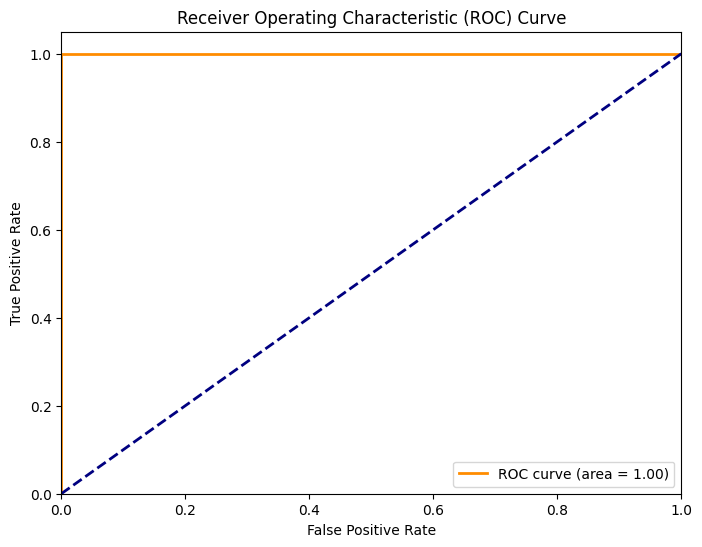

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Results_LBP/final_results_with_all_probabilities.csv')

# Step 1: Count 1s and 0s predictions and create majority vote column
# Get all columns that contain model predictions (Model_X_Pred)
pred_cols = [col for col in df.columns if 'Pred' in col and 'Ensemble' not in col]

# Count number of 1s and 0s for each row
df['Count_1'] = df[pred_cols].sum(axis=1)
df['Count_0'] = len(pred_cols) - df['Count_1']

# Create majority vote column (1 if more 1s than 0s, else 0)
df['Majority_Vote'] = (df['Count_1'] > df['Count_0']).astype(int)

# Step 2: Create ROC curve
# True labels and predicted probabilities
y_true = df['Label']
y_score = df['Average_Probability']

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
# Extract probabilities
probs = df['Average_Probability'].values
# Method 1: Using numpy's percentile
ptop_80_threshold = np.percentile(probs, 80)  # 80th percentile

# Method 2: Manual calculation (equivalent)
sorted_probs = np.sort(probs)
idx = int(len(sorted_probs) * 0.8)  # 80% cutoff index
ptop_80_threshold = sorted_probs[idx]

print(f"Ptop 80% threshold: {ptop_80_threshold:.4f}")

Ptop 80% threshold: 0.4410


In [ ]:
threshold = 0.4410

# Calculate False Acceptance Rate (FAR)
false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold)].shape[0]
total_imposter_attempts = df[df['Label'] == 0].shape[0]
FAR = (false_acceptances / total_imposter_attempts) * 100

# Calculate True Acceptance Rate (TAR)
true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
total_genuine_users = df[df['Label'] == 1].shape[0]
TAR = (true_acceptances / total_genuine_users) * 100

print(f"At threshold = {threshold:.4f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.2f}%")
print(f"- True Acceptance Rate (TAR)  = {TAR:.2f}%")

At threshold = 0.4410:
- False Acceptance Rate (FAR) = 0.00%
- True Acceptance Rate (TAR)  = 75.00%


At threshold = 0.4410:
- False Acceptance Rate (FAR) = 0.00%
- True Acceptance Rate (TAR) = 75.00%
At threshold = 0.4410:
- False Acceptance Rate (FAR) = 0.00%
- True Acceptance Rate (TAR) = 75.00%


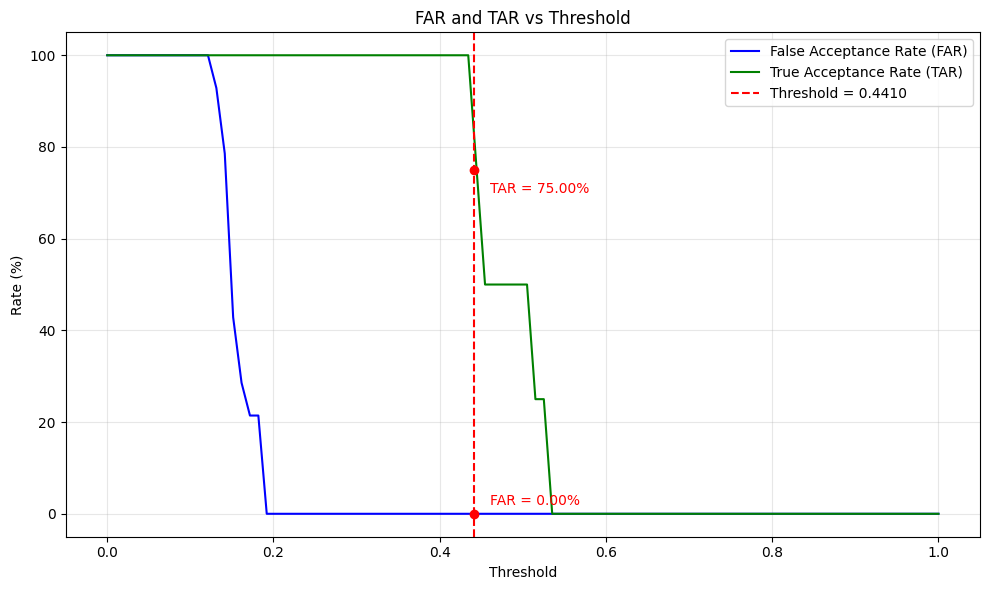

np.float64(1.0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming df is your dataframe with 'Label' and 'Average_Probability' columns
# If you don't have df loaded yet, uncomment and modify this to load your data:
# df = pd.read_csv('your_data.csv')

# Function to calculate FAR and TAR at a specific threshold
def calculate_metrics(df, threshold):
    # Calculate False Acceptance Rate (FAR)
    false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold)].shape[0]
    total_imposter_attempts = df[df['Label'] == 0].shape[0]
    FAR = (false_acceptances / total_imposter_attempts) * 100 if total_imposter_attempts > 0 else 0

    # Calculate True Acceptance Rate (TAR)
    true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
    total_genuine_users = df[df['Label'] == 1].shape[0]
    TAR = (true_acceptances / total_genuine_users) * 100 if total_genuine_users > 0 else 0

    return FAR, TAR

# Create FAR vs Threshold curve
def plot_far_vs_threshold(df, highlight_threshold=0.2604):
    # Generate a range of threshold values
    thresholds = np.linspace(0, 1, 100)

    # Calculate FAR and TAR for each threshold
    far_values = []
    tar_values = []

    for threshold in thresholds:
        far, tar = calculate_metrics(df, threshold)
        far_values.append(far)
        tar_values.append(tar)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot FAR curve
    plt.plot(thresholds, far_values, 'b-', label='False Acceptance Rate (FAR)')

    # Plot TAR curve
    plt.plot(thresholds, tar_values, 'g-', label='True Acceptance Rate (TAR)')

    # Highlight the specific threshold
    specific_far, specific_tar = calculate_metrics(df, highlight_threshold)
    plt.axvline(x=highlight_threshold, color='r', linestyle='--', label=f'Threshold = {highlight_threshold:.4f}')
    plt.plot(highlight_threshold, specific_far, 'ro')
    plt.plot(highlight_threshold, specific_tar, 'ro')

    # Add text for the specific threshold values
    plt.text(highlight_threshold + 0.02, specific_far + 2, f'FAR = {specific_far:.2f}%', color='r')
    plt.text(highlight_threshold + 0.02, specific_tar - 5, f'TAR = {specific_tar:.2f}%', color='r')

    # ROC curve (optional - using scikit-learn)
    fpr, tpr, _ = roc_curve(df['Label'], df['Average_Probability'])
    roc_auc = auc(fpr, tpr)

    # Add labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Rate (%)')
    plt.title('FAR and TAR vs Threshold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)

    # Display the specific threshold metrics
    print(f"At threshold = {highlight_threshold:.4f}:")
    print(f"- False Acceptance Rate (FAR) = {specific_far:.2f}%")
    print(f"- True Acceptance Rate (TAR) = {specific_tar:.2f}%")

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Return the ROC AUC score
    return roc_auc

# Example usage:
# roc_auc = plot_far_vs_threshold(df)
# print(f"ROC AUC: {roc_auc:.4f}")

# For your specific threshold calculation:
threshold = 0.4410
FAR, TAR = calculate_metrics(df, threshold)
print(f"At threshold = {threshold:.4f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.2f}%")
print(f"- True Acceptance Rate (TAR) = {TAR:.2f}%")
plot_far_vs_threshold(df,0.4410 )

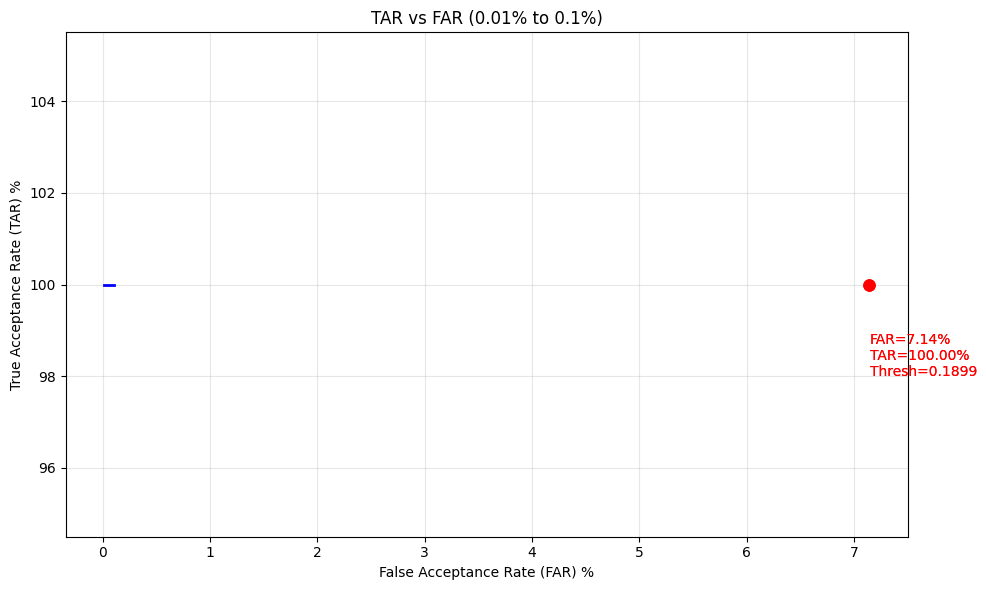


Key Metrics:
At FAR = 7.1429%:
- Threshold = 0.189925
- TAR = 100.00%
----------------------------------------
At FAR = 7.1429%:
- Threshold = 0.189925
- TAR = 100.00%
----------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def find_threshold_at_far(df, target_far):
    """Find the threshold that gives a specific FAR value"""
    # Get all negative (imposter) samples and sort their probabilities
    imposter_probs = df[df['Label'] == 0]['Average_Probability'].sort_values(ascending=False).values
    total_imposters = len(imposter_probs)

    # Calculate how many false accepts would give us the target FAR
    target_false_accepts = int(total_imposters * target_far / 100)

    if target_false_accepts == 0:
        return imposter_probs[0] if len(imposter_probs) > 0 else 1.0  # Most conservative threshold

    # The threshold is the probability at the target_false_accepts index
    return imposter_probs[target_false_accepts - 1]

def plot_far_tar_curve(df, far_range=(0.01, 0.1)):
    """Plot FAR vs TAR curve for specified FAR range"""
    # Generate FAR values from 0.01% to 0.1%
    far_values = np.linspace(far_range[0], far_range[1], 100)

    # Find corresponding thresholds and TAR values
    thresholds = []
    tar_values = []

    for far in far_values:
        threshold = find_threshold_at_far(df, far)
        thresholds.append(threshold)

        # Calculate TAR at this threshold
        true_accepts = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
        total_genuine = df[df['Label'] == 1].shape[0]
        tar = (true_accepts / total_genuine) * 100 if total_genuine > 0 else 0
        tar_values.append(tar)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(far_values, tar_values, 'b-', linewidth=2)

    # Highlight specific points
    for target_far in [0.01, 0.1]:
        threshold = find_threshold_at_far(df, target_far)
        far, tar = calculate_metrics(df, threshold)

        plt.plot(far, tar, 'ro', markersize=8)
        plt.text(far + 0.002, tar - 2,
                 f'FAR={far:.2f}%\nTAR={tar:.2f}%\nThresh={threshold:.4f}',
                 color='red', fontsize=10)

    plt.xlabel('False Acceptance Rate (FAR) %')
    plt.ylabel('True Acceptance Rate (TAR) %')
    plt.title('TAR vs FAR (0.01% to 0.1%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print specific values
    print("\nKey Metrics:")
    for target_far in [0.01, 0.1]:
        threshold = find_threshold_at_far(df, target_far)
        far, tar = calculate_metrics(df, threshold)
        print(f"At FAR = {far:.4f}%:")
        print(f"- Threshold = {threshold:.6f}")
        print(f"- TAR = {tar:.2f}%")
        print("-" * 40)

# Example usage:
plot_far_tar_curve(df, far_range=(0.01, 0.1))

In [ ]:
df['Average_Probability'] = avg_probabilities

# Calculate Ptop80 threshold (80th percentile)
ptop_80_threshold = np.percentile(avg_probabilities, 80)
print(f"\nPtop 80% threshold: {ptop_80_threshold:.4f}")

NameError: name 'avg_probabilities' is not defined

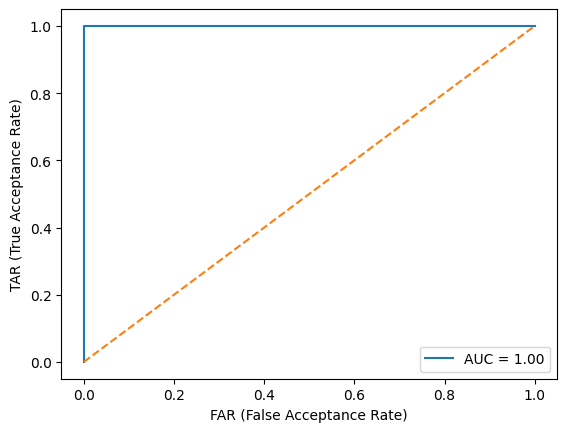

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Random guessing line
plt.xlabel('FAR (False Acceptance Rate)')
plt.ylabel('TAR (True Acceptance Rate)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_score)

# Find threshold where precision ≥ 90%
target_precision = 0.90
idx = np.argmax(precision >= target_precision)
optimal_threshold = thresholds[idx]

print(f"Threshold for Precision ≥ 90%: {optimal_threshold:.4f}")
print(f"Recall at this threshold: {recall[idx] * 100:.2f}%")

Threshold for Precision ≥ 90%: 0.4410
Recall at this threshold: 100.00%


In [ ]:
import numpy as np
# Extract probabilities
probs = df['Average_Probability'].values
# Method 1: Using numpy's percentile
ptop_80_threshold = np.percentile(probs, 80)  # 80th percentile

# Method 2: Manual calculation (equivalent)
sorted_probs = np.sort(probs)
idx = int(len(sorted_probs) * 0.8)  # 80% cutoff index
ptop_80_threshold = sorted_probs[idx]

print(f"Ptop 80% threshold: {ptop_80_threshold:.4f}")

Ptop 80% threshold: 0.4410


In [ ]:
threshold = 0.4410

# Calculate False Acceptance Rate (FAR)
false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold)].shape[0]
total_imposter_attempts = df[df['Label'] == 0].shape[0]
FAR = (false_acceptances / total_imposter_attempts) * 100

# Calculate True Acceptance Rate (TAR)
true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
total_genuine_users = df[df['Label'] == 1].shape[0]
TAR = (true_acceptances / total_genuine_users) * 100

print(f"At threshold = {threshold:.4f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.2f}%")
print(f"- True Acceptance Rate (TAR)  = {TAR:.2f}%")

NameError: name 'df' is not defined